<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[18차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ OCR 방법에 대해 이해할 수 있다<br><br>
○ Tessaract를 이용하여 문자를 인식할 수 있다<br><br>
○ EasyOCR 이용한 문자를 인식할 수 있다<br><br>        
○ 기타 OCR 라이브러리를 사용하여 문자을 인식할 수 있다     
        </font></td></tr>   
</table>

# OCR

- 참고 : https://meissa.tistory.com/80?category=962022

### 개념 

- OCR  =Text detection + Text recognition  
<img src="./data/lecture_image/23_ocr01.png" width=70%>

  - Text detection : Object detection의 문자 찾아내기 확장 버전(Segmentation 및 문자특성 고려)
    - 이미지 내에서 문자를 검출해낼 때엔 검출하기 위한 최소 단위를 설정
    - 단어 단위의 탐지 : Object detection의 Regression기반의 Detection방법
      - Anchor를 정의하고 단어의 유무, Bounding box의 크기를 추정해서 단어를 찾음
      - (예) TextBoxes 방법
    - 글자 단위의 방식 : 글자인 영역을 Segmentation하는 방법으로 접근
      - (예) PixelLink 방법
    - 두 가지 방법을 모두 활용한 방법이 있음
      - CRAFT : Character 단위로 문자의 위치를 찾아낸 뒤 이를 연결하는 방식을 Segmentation기반으로 구현한 방법
      
      - PMTD(Pyramid Mask Text Detector) : Mask-RCNN으로 Text영역 검출 → 단어의 사각형 배치 특성을 반영한 피라미드 형태의 Score map을 활용하여 기존의 부정확한 Mask 영역을 보완
        - Mask-RCNN의 경우 단어 영역이 Box head에 의해 빨간색으로 잡히면 우측 처럼 boundary를 모두 Text 영역으로 잡지만, PMTD는 이를 보완하여 전체 Text 영역을 검출  
<img src="./data/lecture_image/23_ocr03.png" width=60%> 

  - Text recognition : 검출된 영역의 문자가 무엇인지를 인식해 내는 과정
    - Unsegmented Data : 분리에 드는 비용이 비싸거나 어려워 Segmentation이 되어있지 않은 데이터
      - 특징 : segment되어 있지 않은 하위데이터들끼리 시퀀스(sequence)를 이루고 있다는 점
    - CRNN : CNN으로 문자의 특성을 검출하고 Map-To-Sequence로 변환한 후에 Bidirectional LSTM으로 문자를 인식하는 방법

## Tessaract 


- 1980년대 최초로 개발된 OCR 알고리즘 중 하나


- 다운로드 : https://github.com/UB-Mannheim/tesseract/wiki


- tesseract-ocr-w64-setup-v5.0.0-alpha.20201127.exe 파일 다운로드 및 설치

- Additional language data 체크

In [1]:
!pip install pytesseract

In [5]:
import pytesseract

# 설치 폴더 설정
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"  #이건 윈도우용 tesseract

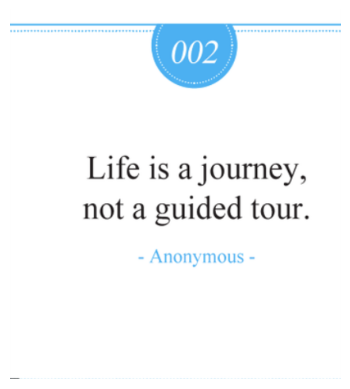

In [4]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

img = cv2.imread("../OpenCV_data/image/text.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

In [6]:
text = pytesseract.image_to_string(img, lang="eng")
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

### 한글 이미지 인식
- 이미지파일 폰트 출력 굉장히 잘되는 편

(-0.5, 502.5, 412.5, -0.5)

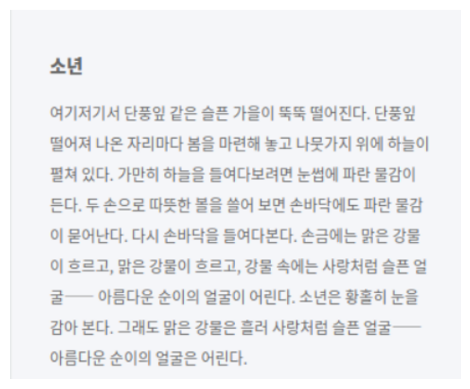

In [6]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("./image/story.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.axis("off")

In [7]:
text = pytesseract.image_to_string(img1, lang="kor")
print(text)

소년

여기저기서 단풍잎 같은 슬픈 가을이 뚝뚝 떨어진다. 단풍잎
떨어져 나온 자리마다 봄을 마련해 놓고 나못가지 위에 하늘이
펼쳐 있다. 가만히 하늘을 들여다보려면 눈썸에 파란 물감이
든다. 두 손으로 따뜻한 볼을 쓸어 보면 손바닥에도 파란 물감
이 묻어난다. 다시 손바닥을 들여다본다. 손금에는 맑은 강물
이 흐르고, 맑은 강물이 흐르고, 강물 속에는 사랑처럼 슬픈 얼
굴ㅡ- 아름다운 순이의 얼굴이 어린다. 소년은 황홀히 눈을
감아 본다. 그래도 맑은 강물은 흘러 사랑처럼 슬픈 얼굴--
아름다운 순이의 얼굴은 어린다.



### 포스터 한글 이미지 인식

(-0.5, 221.5, 299.5, -0.5)

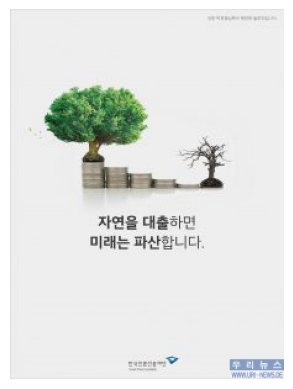

In [10]:
#실습import cv2
import matplotlib.pyplot as plt

img2 = cv2.imread("./image/nature.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.axis("off")



In [9]:
text = pytesseract.image_to_string(img2, lang="kor")
print(text)

자연을 대출하면
미래는 파산합니다




### 번호판 인식

(-0.5, 702.5, 173.5, -0.5)

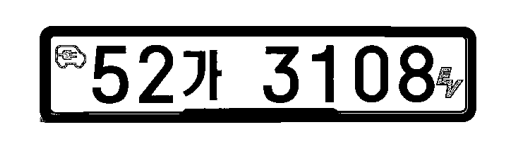

In [82]:
#실습#실습import cv2
import matplotlib.pyplot as plt

img3 = cv2.imread("./image/car.png")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
_, imgth = cv2.threshold(img3_gray,183, 255, cv2.THRESH_BINARY)

plt.imshow(imgth, cmap="gray")
plt.axis("off")

In [83]:
text = pytesseract.image_to_string(imgth, lang="kor")
print(text)

“52가 31089



## EasyOCR

- 문자영역 인식, 문자 인식을 쉽게 할 수 있게 하는 파이썬 라이브러리
- 간단하고 직관적
- 80개 이상의 언어를 지원
- 문자 추출은 CRAFT를 문자 인식은 CRNN을 사용


- 수행 결과로 텍스트의 바운딩 박스 좌표와 읽은 문자를 반환


- 참고 : https://github.com/JaidedAI/EasyOCR

In [7]:
# !pip uninstall opencv-python -y
!pip install opencv-python==4.5.4.60 easyocr --user

  Using cached opencv_python-4.5.4.60-cp37-cp37m-macosx_10_15_x86_64.whl (45.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deepface 0.0.75 requires opencv-python>=4.5.5.64, but you have opencv-python 4.5.4.60 which is incompatible.


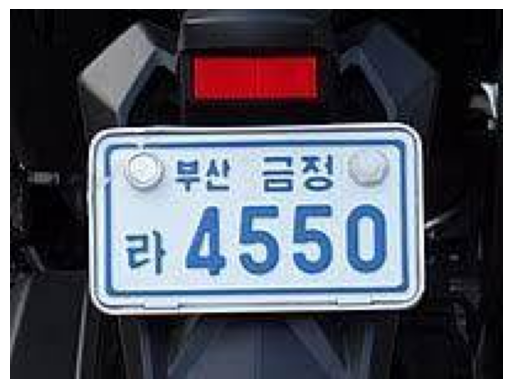

In [2]:
import cv2
import matplotlib.pyplot as plt

img4 = cv2.imread("../OpenCV_data/image/car4.jfif")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
# img4_gray = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
# _, imgth4 = cv2.threshold(img4_gray,183, 255, cv2.THRESH_BINARY)

plt.imshow(img4)
plt.axis("off")
plt.show()

In [3]:
import easyocr

# 인식할 언어 설정
reader = easyocr.Reader(["ko", "en"])

# 글씨 영역, 인식된 글씨, 정확도 반환 
result = reader.readtext(img4)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


: 

: 

In [1]:
result2 = reader.readtext(imgth)
result2

NameError: name 'reader' is not defined

## PaddleOCR

- 참고 
  - https://learnopencv.com/optical-character-recognition-using-paddleocr/?ck_subscriber_id=1390420859
  - https://github.com/PaddlePaddle/PaddleOCR

- 텍스트 감지, 텍스트 방향 분류기 및 텍스트 인식을 제공
- PP-OCR 및 SRN, NRTR 등과 같은 최신 알고리즘을 포함하여 툴킷에 다양한 모델을 제공
- 80 개 이상의 언어를 지원  
<img src="./data/lecture_image/23_paddleocr1.png" width=80%> 

- 설치

In [3]:
!conda create -n paddleocr python==3.7 -y

Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/choiyungyu/opt/anaconda3/envs/paddleocr

  added / updated specs:
    - python==3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libedit-3.1.20221030       |       h6c40b1e_0         155 KB
    libffi-3.2.1               |    h0a44026_1007          43 KB
    openssl-1.0.2u             |       h1de35cc_0         2.0 MB
    python-3.7.0               |       hc167b69_0        13.2 MB
    readline-7.0               |       h1de35cc_5         316 KB
    sqlite-3.33.0              |       hffcf06c_0         1.3 MB
    ------------------------------------------------------------
                                           Total:        17.0 MB

The following NEW packages will be INSTALLED:

  ca-certificate

In [9]:
!activate paddleocr

zsh:1: command not found: activate


In [8]:
!git clone https://gitee.com/paddlepaddle/PaddleOCR.git

'PaddleOCR'에 복제합니다...
remote: Enumerating objects: 45032, done.
remote: Counting objects: 100% (19411/19411), done.
remote: Compressing objects: 100% (6942/6942), done.
remote: Total 45032 (delta 14187), reused 17346 (delta 12332), pack-reused 25621
오브젝트를 받는 중: 100% (45032/45032), 335.31 MiB | 3.73 MiB/s, 완료.
델타를 알아내는 중: 100% (32048/32048), 완료.


In [10]:
!pip install -r ./PaddleOCR/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 15.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.3/987.3 kB 26.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 14.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.

In [11]:
# !pip install paddlepaddle-gpu paddleocr --user
!pip install paddlepaddle paddleocr --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 MB 17.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.6/440.6 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 7.2 MB/s eta 0:00:00
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184489 sha256=cc9abcf5450cfbc48859f0594e336299c061f2d793c66c607c6ed0a2badf7b7d
  Stored in directory: /Users/choiyungyu/Library/Caches/pip/wheels/8d/43/ab/6dfe2e7103b24fb1148e95b265fd71d23d29bcbaa60a4a7ed9
Successfully built python-docx
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding th

- 라이브러리 및 학습된 모델 로딩

In [12]:
from paddleocr import PaddleOCR, draw_ocr
import os
import cv2
import matplotlib.pyplot as plt

# lang = ch, en, french, germen, korean, japan
ocr = PaddleOCR(use_angle_cls=True, lang="en")

: 

: 

- 인식

In [6]:
# 출력함수
def result_ocr(img_path, result, font):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     print(result)
    
    # result에서 텍스트 위치, 내용, 정확도 저장
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    conf = [line[1][1] for line in result]
    
    # OCR 결과 출력함수를 이용해서 출력
    im_show = draw_ocr(image, boxes, txts, conf, font_path=font)
    
    plt.figure(figsize=(12,12))
    plt.imshow(im_show)
    plt.axis("off")
    
    
    

- 영수증 인식

[2022/09/23 15:29:51] ppocr DEBUG: dt_boxes num : 34, elapse : 0.09905672073364258
[2022/09/23 15:29:51] ppocr DEBUG: cls num  : 34, elapse : 0.33992958068847656
[2022/09/23 15:29:55] ppocr DEBUG: rec_res num  : 34, elapse : 3.796743154525757


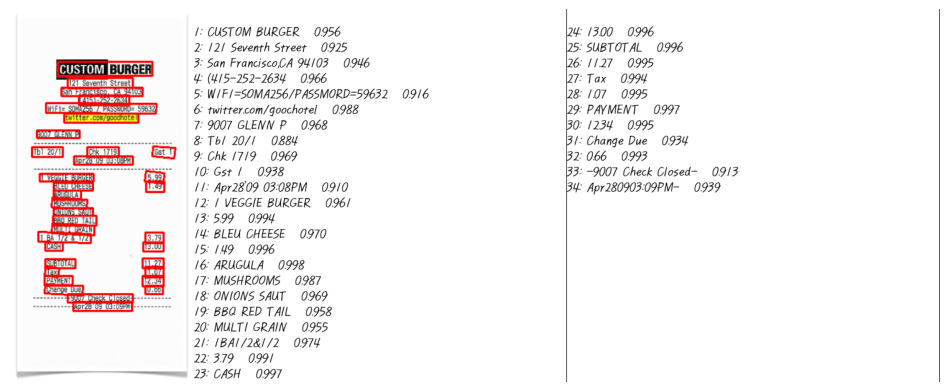

In [7]:
img_path = "./image/receipt1.png"

result = ocr.ocr(img_path)

font = "./image/HMFMPYUN.TTF"

result_ocr(img_path, result, font)

In [8]:
ocrk = PaddleOCR(use_angle_cls=True, lang="korean")

[2022/09/23 15:29:55] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\AI/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\AI/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_mo

[2022/09/23 15:29:57] ppocr DEBUG: dt_boxes num : 66, elapse : 0.5558784008026123
[2022/09/23 15:29:58] ppocr DEBUG: cls num  : 66, elapse : 0.742018461227417
[2022/09/23 15:30:04] ppocr DEBUG: rec_res num  : 66, elapse : 6.185763120651245


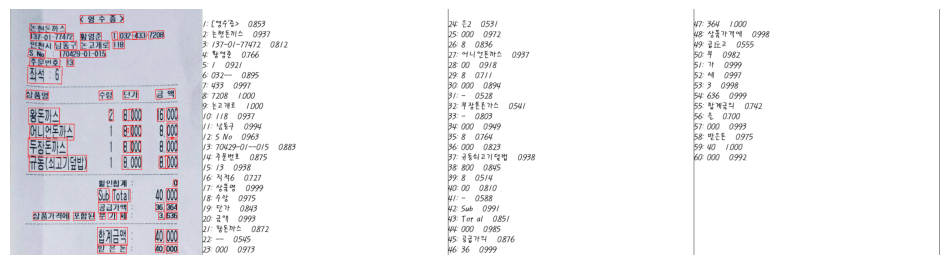

In [9]:
img_path = "./image/receipt1.jpg"

result = ocrk.ocr(img_path)

font = "./image/HMFMPYUN.TTF"

result_ocr(img_path, result, font)

- ID 카드 인식

[2022/09/23 15:40:15] ppocr DEBUG: dt_boxes num : 13, elapse : 0.3201944828033447
[2022/09/23 15:40:15] ppocr DEBUG: cls num  : 13, elapse : 0.13256502151489258
[2022/09/23 15:40:17] ppocr DEBUG: rec_res num  : 13, elapse : 2.280407667160034


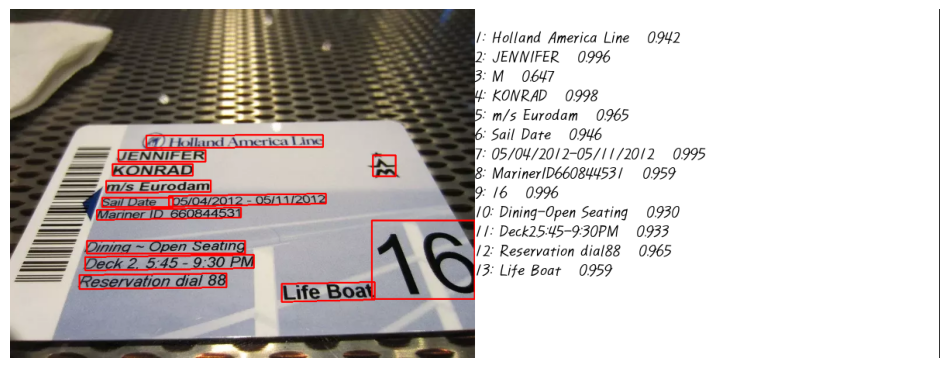

In [10]:
img_path = "./image/id-card.png"

result = ocr.ocr(img_path)

font = "./image/HMFMPYUN.TTF"

result_ocr(img_path, result, font)

- 손글씨 인식

[2022/09/23 15:41:41] ppocr DEBUG: dt_boxes num : 5, elapse : 0.6559486389160156
[2022/09/23 15:41:41] ppocr DEBUG: cls num  : 5, elapse : 0.08731627464294434
[2022/09/23 15:41:42] ppocr DEBUG: rec_res num  : 5, elapse : 0.5102725028991699


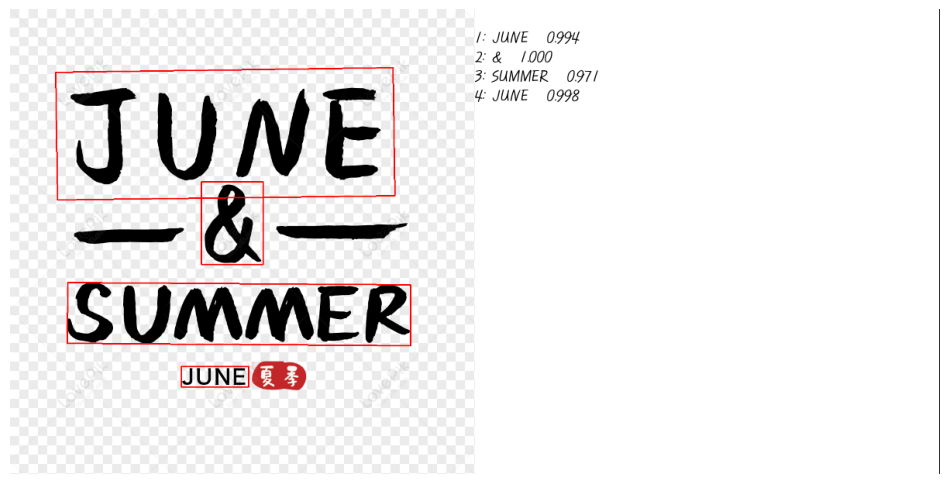

In [11]:
img_path = "./image/hand_english.png"

result = ocr.ocr(img_path)

font = "./image/HMFMPYUN.TTF"

result_ocr(img_path, result, font)

- 자동차 번호판

[2022/09/23 15:55:22] ppocr DEBUG: dt_boxes num : 1, elapse : 0.15387845039367676
[2022/09/23 15:55:22] ppocr DEBUG: cls num  : 1, elapse : 0.010092735290527344
[2022/09/23 15:55:22] ppocr DEBUG: rec_res num  : 1, elapse : 0.09573531150817871


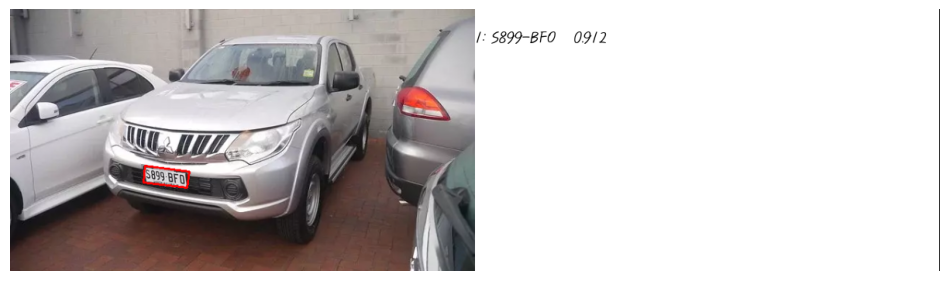

In [12]:
img_path = "./image/car_number.png"

result = ocr.ocr(img_path)

font = "./image/HMFMPYUN.TTF"

result_ocr(img_path, result, font)

- 도로 표지판

[2022/09/23 15:55:56] ppocr DEBUG: dt_boxes num : 10, elapse : 0.41904449462890625
[2022/09/23 15:55:56] ppocr DEBUG: cls num  : 10, elapse : 0.1121068000793457
[2022/09/23 15:55:57] ppocr DEBUG: rec_res num  : 10, elapse : 1.054114818572998


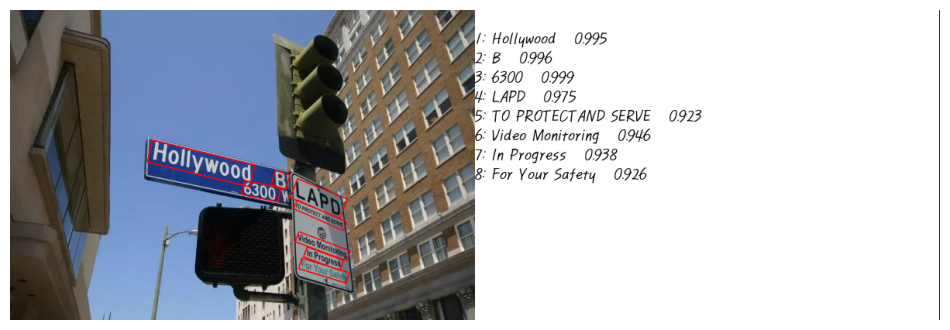

In [13]:
img_path = "./image/load_sign.png"

result = ocr.ocr(img_path)

font = "./image/HMFMPYUN.TTF"

result_ocr(img_path, result, font)

- 곡선 텍스트

[2022/09/23 15:59:09] ppocr DEBUG: dt_boxes num : 18, elapse : 0.21849942207336426
[2022/09/23 15:59:09] ppocr DEBUG: cls num  : 18, elapse : 0.19754910469055176
[2022/09/23 15:59:10] ppocr DEBUG: rec_res num  : 18, elapse : 1.726433515548706


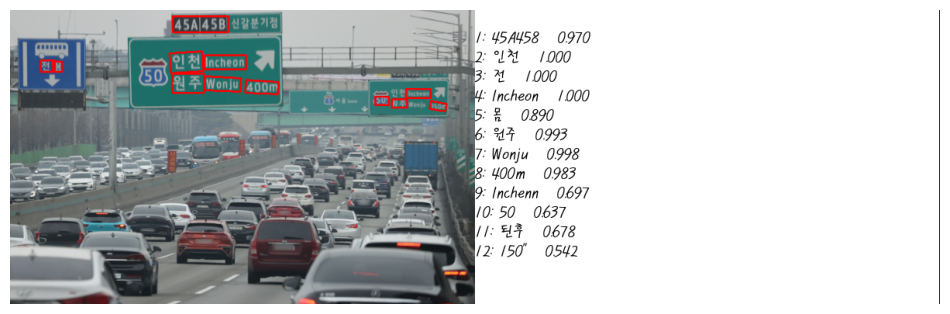

In [14]:
img_path = "./image/road.jpg"

result = ocrk.ocr(img_path)

font = "./image/HMFMPYUN.TTF"

result_ocr(img_path, result, font)

[2022/09/23 15:59:43] ppocr DEBUG: dt_boxes num : 2, elapse : 0.449535608291626
[2022/09/23 15:59:43] ppocr DEBUG: cls num  : 2, elapse : 0.024590015411376953
[2022/09/23 15:59:43] ppocr DEBUG: rec_res num  : 2, elapse : 0.20807337760925293


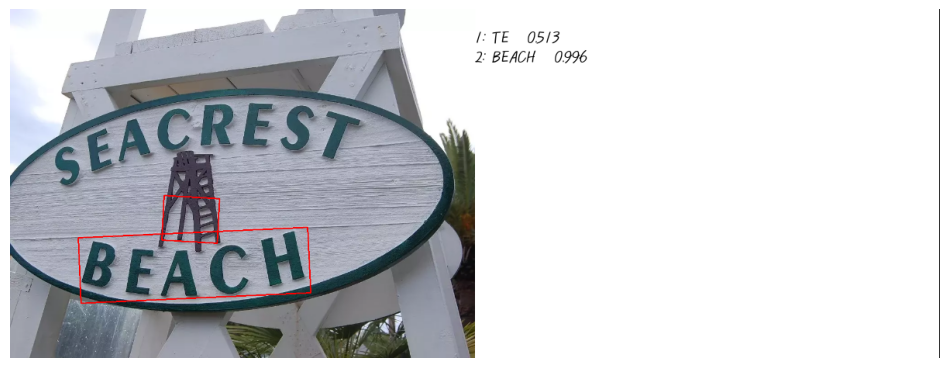

In [15]:
img_path = "./image/curved_text1.png"

result = ocr.ocr(img_path)

font = "./image/HMFMPYUN.TTF"

result_ocr(img_path, result, font)

## 구글 OCR API 활용

- 참고 : https://cloud.google.com/vision/docs/quickstart

## Naver 클로버 OCR

- 참고 : https://clova.ai/ocr?lang=ko